In [239]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [240]:
results_bab = pd.read_csv('resultsBAB.csv')
results_dp = pd.read_csv('resultsDP.csv')
results_sh = pd.read_csv('resultsSH.csv')
results_bf = pd.read_csv('resultsBF.csv')

results_bab_new = pd.read_csv('resultsBAB_new.csv')
results_dp_new = pd.read_csv('resultsDP_new.csv')
results_sh_new = pd.read_csv('resultsSH_new.csv')
results_bf_new = pd.read_csv('resultsBF_new.csv')

results_bab_cwr = pd.read_csv('resultsBAB_CWR.csv')
results_dp_cwr = pd.read_csv('resultsDP_CWR.csv')
results_sh_cwr = pd.read_csv('resultsSH_CWR.csv')
results_bf_cwr = pd.read_csv('resultsBF_CWR.csv')

results_bab_gr = pd.read_csv('resultsBAB_GR.csv')
results_dp_gr = pd.read_csv('resultsDP_GR.csv')
results_sh_gr = pd.read_csv('resultsSH_GR.csv')
results_bf_gr = pd.read_csv('resultsBF_GR.csv')

results_sh_perm = pd.read_csv('resultsSH_perm.csv')

In [241]:
results_bab = results_bab[results_bab['type'] != 'MW']
results_bab = results_bab[results_bab['type'] != 'MC']
results_dp = results_dp[results_dp['type'] != 'MW']
results_dp = results_dp[results_dp['type'] != 'MC']
results_sh = results_sh[results_sh['type'] != 'MW']
results_sh = results_sh[results_sh['type'] != 'MC']
results_bf = results_bf[results_bf['type'] != 'MW']
results_bf = results_bf[results_bf['type'] != 'MC']

print(results_bab)

results_bab = pd.concat([results_bab, results_bab_new])
results_dp = pd.concat([results_dp, results_dp_new])
results_sh = pd.concat([results_sh, results_sh_new])
results_bf = pd.concat([results_bf, results_bf_new])

print(results_bab)

     n  type  runtime_microseconds  maximum_cost  maximum_weight  \
0   10    IS                  3203           300             150   
1   15    IS                 18283           300             150   
2   20    IS                 88305           300             150   
3   25    IS                332513           300             150   
4   30    IS               1196811           300             150   
15  20   CWR                 84114           300             150   
16  20   CWR                 90302           300             150   
17  20   CWR                 88270           300             150   
18  20   CWR                 91065           300             150   
19  20   CWR                 93744           300             150   
20  20   CWC                324651           300             150   
21  20   CWC                313313           300             150   
22  20   CWC                 82460           300             150   
23  20    GR                 90032           300

In [242]:
results_bab = results_bab[results_bab['type'] != 'CWR']
results_dp = results_dp[results_dp['type'] != 'CWR']
results_sh = results_sh[results_sh['type'] != 'CWR']
results_bf = results_bf[results_bf['type'] != 'CWR']

results_bab = pd.concat([results_bab, results_bab_cwr])
results_dp = pd.concat([results_dp, results_dp_cwr])
results_sh = pd.concat([results_sh, results_sh_cwr])
results_bf = pd.concat([results_bf, results_bf_cwr])


In [243]:
results_bab = results_bab[results_bab['type'] != 'GR']
results_dp = results_dp[results_dp['type'] != 'GR']
results_sh = results_sh[results_sh['type'] != 'GR']
results_bf = results_bf[results_bf['type'] != 'GR']

results_bab = pd.concat([results_bab, results_bab_gr])
results_dp = pd.concat([results_dp, results_dp_gr])
results_sh = pd.concat([results_sh, results_sh_gr])
results_bf = pd.concat([results_bf, results_bf_gr])

In [244]:
results_sh = results_sh[results_sh['type'] != 'PERM']
results_sh = pd.concat([results_sh, results_sh_perm])

In [245]:
results_sh.rename(columns={'measured_time_microseconds': 'runtime_microseconds'}, inplace=True)


In [246]:
print(results_bab.head())

print(results_dp.head())

print(results_sh.head())

print(results_bf.head())

    n type  runtime_microseconds  maximum_cost  maximum_weight  \
0  10   IS                  3203           300             150   
1  15   IS                 18283           300             150   
2  20   IS                 88305           300             150   
3  25   IS                332513           300             150   
4  30   IS               1196811           300             150   

   capacity_to_weight_ratio cost_weight_correlation  granularity_exponent  \
0                       0.8                     uni                   1.0   
1                       0.8                     uni                   1.0   
2                       0.8                     uni                   1.0   
3                       0.8                     uni                   1.0   
4                       0.8                     uni                   1.0   

  majority_of_items  
0               bal  
1               bal  
2               bal  
3               bal  
4               bal  
    n ty

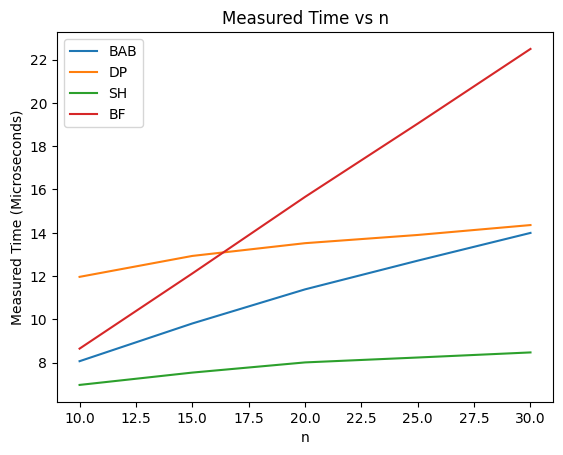

In [247]:
# by IS
results_bab_is = results_bab[results_bab['type'] == 'IS'].copy()
results_dp_is = results_dp[results_dp['type'] == 'IS'].copy()
results_sh_is = results_sh[results_sh['type'] == 'IS'].copy()
results_bf_is = results_bf[results_bf['type'] == 'IS'].copy()

results_bab_is.loc[:, 'log_runtime_microseconds'] = np.log(results_bab_is['runtime_microseconds'])
results_dp_is.loc[:, 'log_runtime_microseconds'] = np.log(results_dp_is['runtime_microseconds'])
results_sh_is.loc[:, 'log_runtime_microseconds'] = np.log(results_sh_is['runtime_microseconds'])
results_bf_is.loc[:, 'log_runtime_microseconds'] = np.log(results_bf_is['runtime_microseconds'])
    
plt.figure()
plt.plot(results_bab_is['n'], results_bab_is['log_runtime_microseconds'], label='BAB')
plt.plot(results_dp_is['n'], results_dp_is['log_runtime_microseconds'], label='DP')
plt.plot(results_sh_is['n'], results_sh_is['log_runtime_microseconds'], label='SH')
plt.plot(results_bf_is['n'], results_bf_is['log_runtime_microseconds'], label='BF')
plt.xlabel('n')
plt.ylabel('Measured Time (Microseconds)')
plt.title(f'Measured Time vs n')
plt.legend()

plt.savefig(f'IS_runtime_vs_n.png')

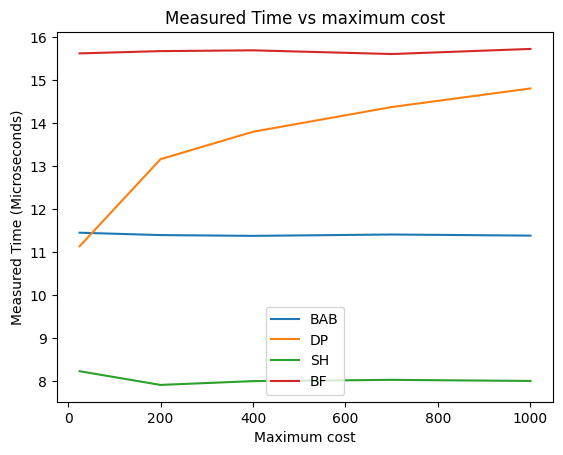

In [248]:
# by MC
results_bab_mc = results_bab[results_bab['type'] == 'MC'].copy()
results_dp_mc = results_dp[results_dp['type'] == 'MC'].copy()
results_sh_mc = results_sh[results_sh['type'] == 'MC'].copy()
results_bf_mc = results_bf[results_bf['type'] == 'MC'].copy()

results_bab_mc.loc[:, 'log_runtime_microseconds'] = np.log(results_bab_mc['runtime_microseconds'])
results_dp_mc.loc[:, 'log_runtime_microseconds'] = np.log(results_dp_mc['runtime_microseconds'])
results_sh_mc.loc[:, 'log_runtime_microseconds'] = np.log(results_sh_mc['runtime_microseconds'])
results_bf_mc.loc[:, 'log_runtime_microseconds'] = np.log(results_bf_mc['runtime_microseconds'])

plt.figure()
plt.plot(results_bab_mc['maximum_cost'], results_bab_mc['log_runtime_microseconds'], label='BAB')
plt.plot(results_dp_mc['maximum_cost'], results_dp_mc['log_runtime_microseconds'], label='DP')
plt.plot(results_sh_mc['maximum_cost'], results_sh_mc['log_runtime_microseconds'], label='SH')
plt.plot(results_bf_mc['maximum_cost'], results_bf_mc['log_runtime_microseconds'], label='BF')
plt.xlabel('Maximum cost')
plt.ylabel('Measured Time (Microseconds)')
plt.title(f'Measured Time vs maximum cost')
plt.legend()

plt.savefig(f'MC_runtime_vs_n.png')

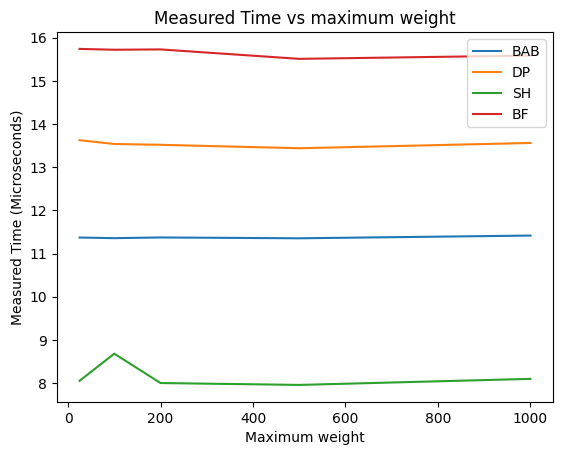

In [249]:
# by MW(maximum_weight)

results_bab_mw = results_bab[results_bab['type'] == 'MW'].copy()
results_dp_mw = results_dp[results_dp['type'] == 'MW'].copy()
results_sh_mw = results_sh[results_sh['type'] == 'MW'].copy()
results_bf_mw = results_bf[results_bf['type'] == 'MW'].copy()

results_bab_mw.loc[:, 'log_runtime_microseconds'] = np.log(results_bab_mw['runtime_microseconds'])
results_dp_mw.loc[:, 'log_runtime_microseconds'] = np.log(results_dp_mw['runtime_microseconds'])
results_sh_mw.loc[:, 'log_runtime_microseconds'] = np.log(results_sh_mw['runtime_microseconds'])
results_bf_mw.loc[:, 'log_runtime_microseconds'] = np.log(results_bf_mw['runtime_microseconds'])

plt.figure()
plt.plot(results_bab_mw['maximum_weight'], results_bab_mw['log_runtime_microseconds'], label='BAB')
plt.plot(results_dp_mw['maximum_weight'], results_dp_mw['log_runtime_microseconds'], label='DP')
plt.plot(results_sh_mw['maximum_weight'], results_sh_mw['log_runtime_microseconds'], label='SH')
plt.plot(results_bf_mw['maximum_weight'], results_bf_mw['log_runtime_microseconds'], label='BF')
plt.xlabel('Maximum weight')
plt.ylabel('Measured Time (Microseconds)')
plt.title(f'Measured Time vs maximum weight')
plt.legend()

plt.savefig(f'MW_runtime_vs_n.png')

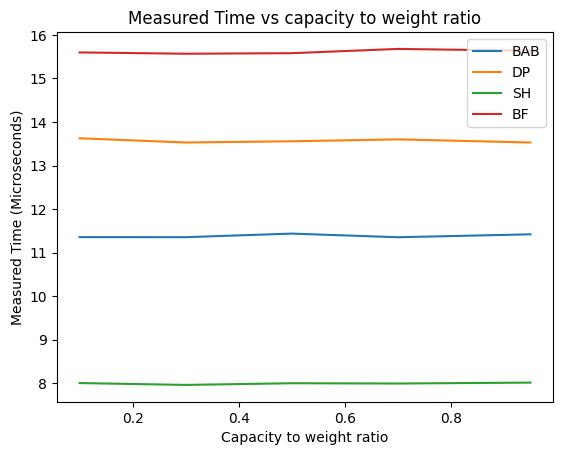

In [250]:
# by CWR(capacity_to_weight_ratio)

results_bab_cwr = results_bab[results_bab['type'] == 'CWR'].copy()
results_dp_cwr = results_dp[results_dp['type'] == 'CWR'].copy()
results_sh_cwr = results_sh[results_sh['type'] == 'CWR'].copy()
results_bf_cwr = results_bf[results_bf['type'] == 'CWR'].copy()

results_bab_cwr.loc[:, 'log_runtime_microseconds'] = np.log(results_bab_cwr['runtime_microseconds'])
results_dp_cwr.loc[:, 'log_runtime_microseconds'] = np.log(results_dp_cwr['runtime_microseconds'])
results_sh_cwr.loc[:, 'log_runtime_microseconds'] = np.log(results_sh_cwr['runtime_microseconds'])
results_bf_cwr.loc[:, 'log_runtime_microseconds'] = np.log(results_bf_cwr['runtime_microseconds'])

plt.figure()
plt.plot(results_bab_cwr['capacity_to_weight_ratio'], results_bab_cwr['log_runtime_microseconds'], label='BAB')
plt.plot(results_dp_cwr['capacity_to_weight_ratio'], results_dp_cwr['log_runtime_microseconds'], label='DP')
plt.plot(results_sh_cwr['capacity_to_weight_ratio'], results_sh_cwr['log_runtime_microseconds'], label='SH')
plt.plot(results_bf_cwr['capacity_to_weight_ratio'], results_bf_cwr['log_runtime_microseconds'], label='BF')
plt.xlabel('Capacity to weight ratio')
plt.ylabel('Measured Time (Microseconds)')
plt.title(f'Measured Time vs capacity to weight ratio')
plt.legend()
    
plt.savefig(f'CWR_runtime_vs_cwr.png')

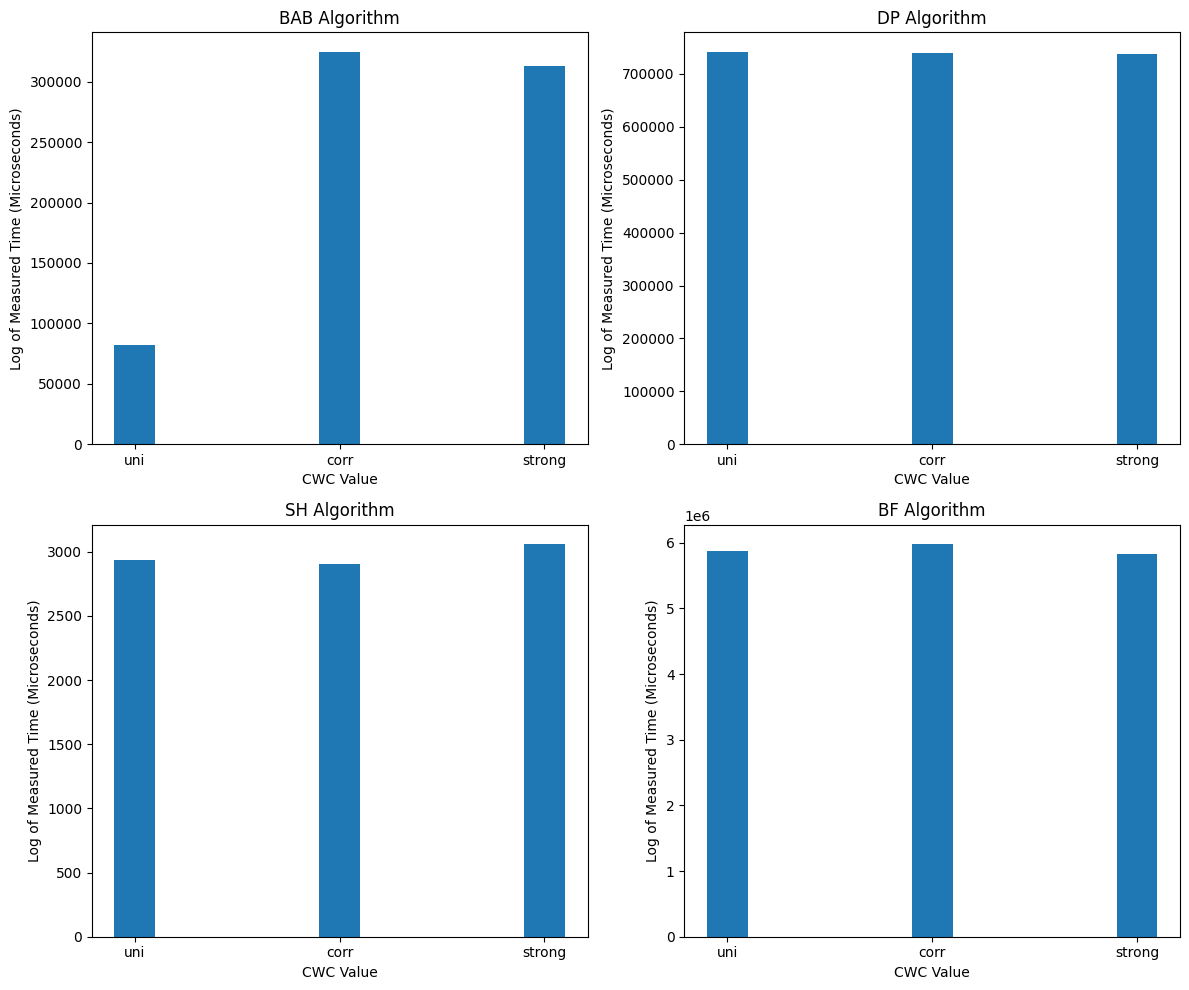

In [251]:
results_bab_cwc = results_bab[results_bab['type'] == 'CWC'].copy()
results_dp_cwc = results_dp[results_dp['type'] == 'CWC'].copy()
results_sh_cwc = results_sh[results_sh['type'] == 'CWC'].copy()
results_bf_cwc = results_bf[results_bf['type'] == 'CWC'].copy()

cwc_values = ['uni', 'corr', 'strong']
n_groups = 3  # Number of CWC values
bar_width = 0.2
index = np.arange(n_groups)

avg_runtime_bab = [results_bab_cwc[results_bab_cwc['cost_weight_correlation'] == val]['runtime_microseconds'].values[0] for val in cwc_values]
avg_runtime_dp = [results_dp_cwc[results_dp_cwc['cost_weight_correlation'] == val]['runtime_microseconds'].values[0] for val in cwc_values]
avg_runtime_sh = [results_sh_cwc[results_sh_cwc['cost_weight_correlation'] == val]['runtime_microseconds'].values[0] for val in cwc_values]
avg_runtime_bf = [results_bf_cwc[results_bf_cwc['cost_weight_correlation'] == val]['runtime_microseconds'].values[0] for val in cwc_values]

fig, axs = plt.subplots(2, 2, figsize=(12, 10))

axs[0, 0].bar(index, avg_runtime_bab, bar_width, label='BAB')
axs[0, 0].set_xlabel('CWC Value')
axs[0, 0].set_ylabel('Log of Measured Time (Microseconds)')
axs[0, 0].set_title('BAB Algorithm')
axs[0, 0].set_xticks(index)
axs[0, 0].set_xticklabels(cwc_values)
axs[0, 0].set_ylim(bottom=0)

axs[0, 1].bar(index, avg_runtime_dp, bar_width, label='DP')
axs[0, 1].set_xlabel('CWC Value')
axs[0, 1].set_ylabel('Log of Measured Time (Microseconds)')
axs[0, 1].set_title('DP Algorithm')
axs[0, 1].set_xticks(index)
axs[0, 1].set_xticklabels(cwc_values)
axs[0, 1].set_ylim(bottom=0)

axs[1, 0].bar(index, avg_runtime_sh, bar_width, label='SH')
axs[1, 0].set_xlabel('CWC Value')
axs[1, 0].set_ylabel('Log of Measured Time (Microseconds)')
axs[1, 0].set_title('SH Algorithm')
axs[1, 0].set_xticks(index)
axs[1, 0].set_xticklabels(cwc_values)
axs[1, 0].set_ylim(bottom=0)

axs[1, 1].bar(index, avg_runtime_bf, bar_width, label='BF')
axs[1, 1].set_xlabel('CWC Value')
axs[1, 1].set_ylabel('Log of Measured Time (Microseconds)')
axs[1, 1].set_title('BF Algorithm')
axs[1, 1].set_xticks(index)
axs[1, 1].set_xticklabels(cwc_values)
axs[1, 1].set_ylim(bottom=0)

plt.tight_layout()
plt.savefig('CWC_runtime_vs_cwc.png')
plt.show()

In [252]:
bar_width = 0.3

results_bab_mw = results_bab[results_bab['type'] == 'GR'].copy()
results_dp_mw = results_dp[results_dp['type'] == 'GR'].copy()
results_sh_mw = results_sh[results_sh['type'] == 'GR'].copy()
results_bf_mw = results_bf[results_bf['type'] == 'GR'].copy()

results_bab_mw_heavy = results_bab_mw[results_bab_mw['majority_of_items'] == 'heavy'].copy()
results_dp_mw_heavy = results_dp_mw[results_dp_mw['majority_of_items'] == 'heavy'].copy()
results_sh_mw_heavy = results_sh_mw[results_sh_mw['majority_of_items'] == 'heavy'].copy()
results_bf_mw_heavy = results_bf_mw[results_bf_mw['majority_of_items'] == 'heavy'].copy()

results_bab_mw_light = results_bab_mw[results_bab_mw['majority_of_items'] == 'light'].copy()
results_dp_mw_light = results_dp_mw[results_dp_mw['majority_of_items'] == 'light'].copy()
results_sh_mw_light = results_sh_mw[results_sh_mw['majority_of_items'] == 'light'].copy()
results_bf_mw_light = results_bf_mw[results_bf_mw['majority_of_items'] == 'light'].copy()

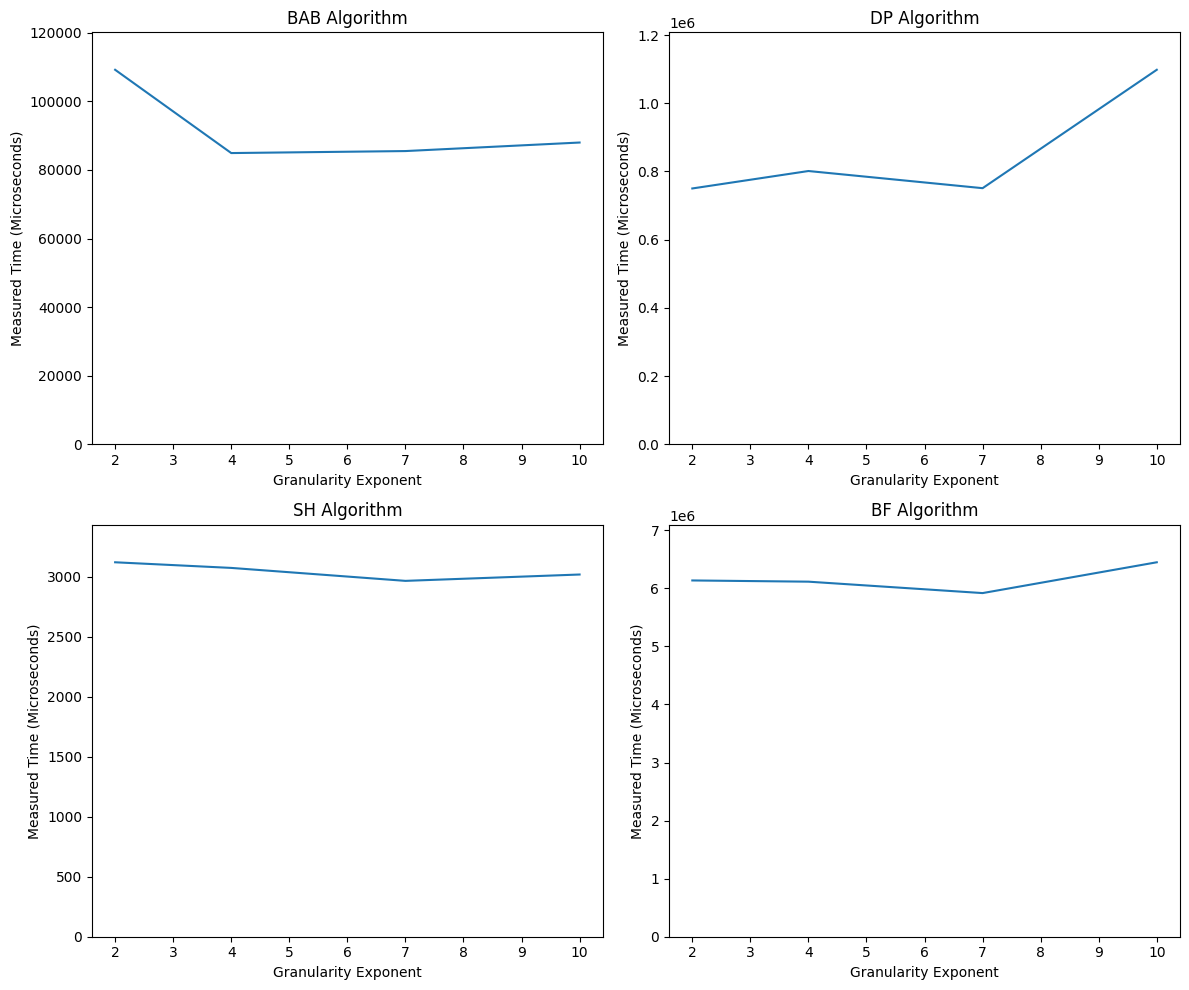

In [253]:
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

axs[0, 0].plot(results_bab_mw_heavy['granularity_exponent'], results_bab_mw_heavy['runtime_microseconds'])
axs[0, 0].set_xlabel('Granularity Exponent')
axs[0, 0].set_ylabel('Measured Time (Microseconds)')
axs[0, 0].set_title('BAB Algorithm')
axs[0, 0].set_ylim(bottom=0, top=results_bab_mw_heavy['runtime_microseconds'].max() * 1.1)

axs[0, 1].plot(results_dp_mw_heavy['granularity_exponent'], results_dp_mw_heavy['runtime_microseconds'])
axs[0, 1].set_xlabel('Granularity Exponent')
axs[0, 1].set_ylabel('Measured Time (Microseconds)')
axs[0, 1].set_title('DP Algorithm')
axs[0, 1].set_ylim(bottom=0, top=results_dp_mw_heavy['runtime_microseconds'].max() * 1.1)

axs[1, 0].plot(results_sh_mw_heavy['granularity_exponent'], results_sh_mw_heavy['runtime_microseconds'])
axs[1, 0].set_xlabel('Granularity Exponent')
axs[1, 0].set_ylabel('Measured Time (Microseconds)')
axs[1, 0].set_title('SH Algorithm')
axs[1, 0].set_ylim(bottom=0, top=results_sh_mw_heavy['runtime_microseconds'].max() * 1.1)

axs[1, 1].plot(results_bf_mw_heavy['granularity_exponent'], results_bf_mw_heavy['runtime_microseconds'])
axs[1, 1].set_xlabel('Granularity Exponent')
axs[1, 1].set_ylabel('Measured Time (Microseconds)')
axs[1, 1].set_title('BF Algorithm')
axs[1, 1].set_ylim(bottom=0, top=results_bf_mw_heavy['runtime_microseconds'].max() * 1.1)

plt.tight_layout()
plt.savefig('GR_runtime_vs_k_heavy.png')

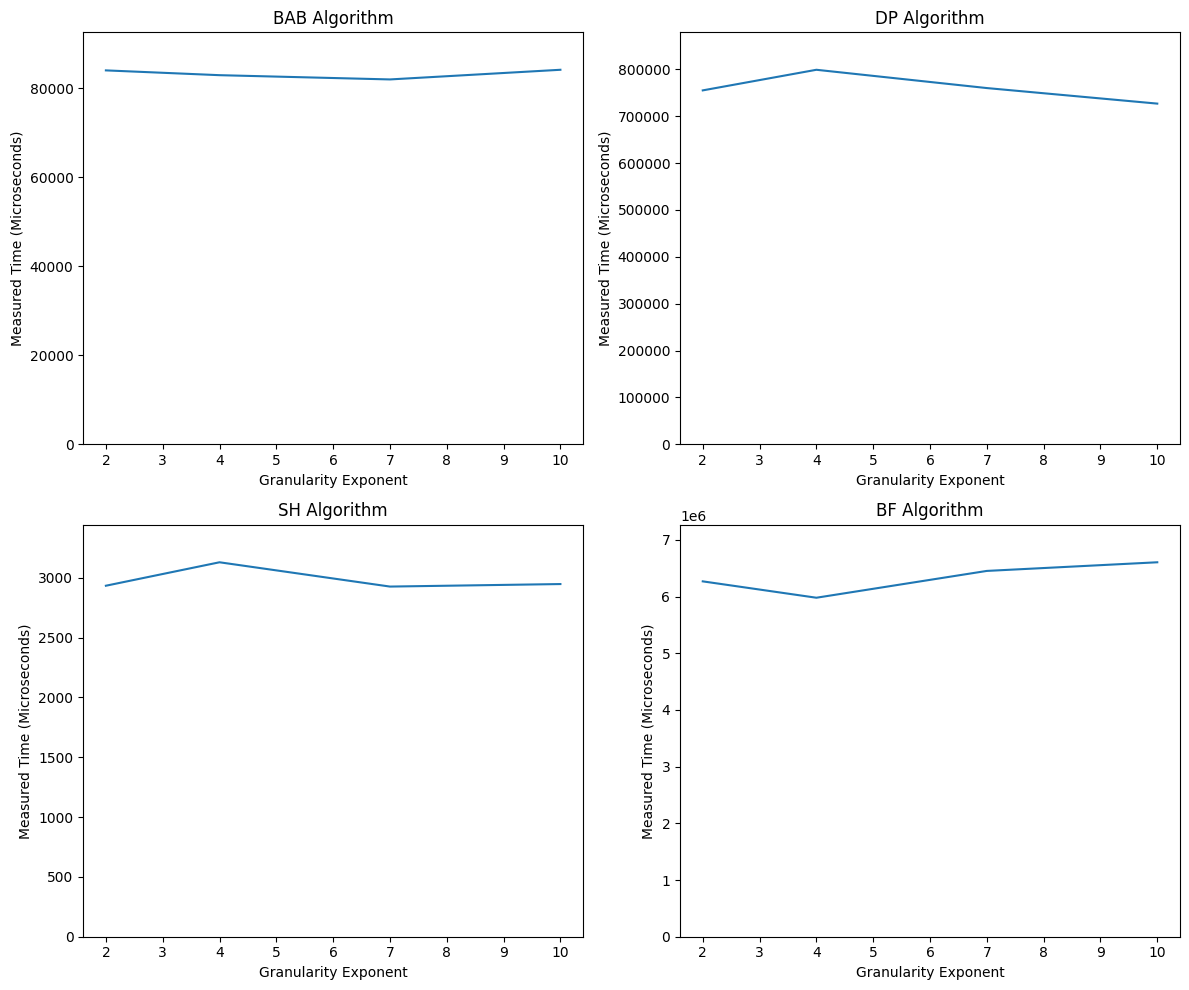

In [254]:
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

axs[0, 0].plot(results_bab_mw_light['granularity_exponent'], results_bab_mw_light['runtime_microseconds'])
axs[0, 0].set_xlabel('Granularity Exponent')
axs[0, 0].set_ylabel('Measured Time (Microseconds)')
axs[0, 0].set_title('BAB Algorithm')
axs[0, 0].set_ylim(bottom=0, top=results_bab_mw_light['runtime_microseconds'].max() * 1.1)

axs[0, 1].plot(results_dp_mw_light['granularity_exponent'], results_dp_mw_light['runtime_microseconds'])
axs[0, 1].set_xlabel('Granularity Exponent')
axs[0, 1].set_ylabel('Measured Time (Microseconds)')
axs[0, 1].set_title('DP Algorithm')
axs[0, 1].set_ylim(bottom=0, top=results_dp_mw_light['runtime_microseconds'].max() * 1.1)

axs[1, 0].plot(results_sh_mw_light['granularity_exponent'], results_sh_mw_light['runtime_microseconds'])
axs[1, 0].set_xlabel('Granularity Exponent')
axs[1, 0].set_ylabel('Measured Time (Microseconds)')
axs[1, 0].set_title('SH Algorithm')
axs[1, 0].set_ylim(bottom=0, top=results_sh_mw_light['runtime_microseconds'].max() * 1.1)

axs[1, 1].plot(results_bf_mw_light['granularity_exponent'], results_bf_mw_light['runtime_microseconds'])
axs[1, 1].set_xlabel('Granularity Exponent')
axs[1, 1].set_ylabel('Measured Time (Microseconds)')
axs[1, 1].set_title('BF Algorithm')
axs[1, 1].set_ylim(bottom=0, top=results_bf_mw_light['runtime_microseconds'].max() * 1.1)

plt.tight_layout()
plt.savefig('GR_runtime_vs_k_light.png')

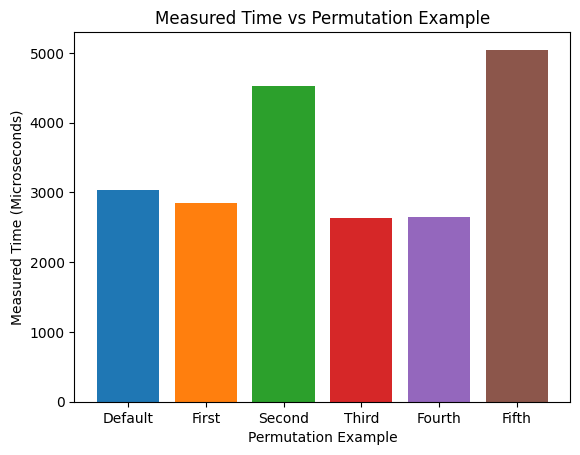

In [255]:
default_values_sh = results_sh[results_sh['type'] == 'IS'].copy()
default_values_bab = default_values_sh[default_values_sh['n'] == 20]
runtime_bab = default_values_bab['runtime_microseconds']

perm_examples = results_sh[results_sh['type'] == 'PERM'].copy()
first_example = perm_examples[perm_examples['perm_num'] == 1]
second_example = perm_examples[perm_examples['perm_num'] == 2]
third_example = perm_examples[perm_examples['perm_num'] == 3]
fourth_example = perm_examples[perm_examples['perm_num'] == 4]
fifth_example = perm_examples[perm_examples['perm_num'] == 5]

plt.bar('Default', runtime_bab, label='Default Values')
plt.bar('First', first_example['runtime_microseconds'].values[0], label='First Example')
plt.bar('Second', second_example['runtime_microseconds'].values[0], label='Second Example')
plt.bar('Third', third_example['runtime_microseconds'].values[0], label='Third Example')
plt.bar('Fourth', fourth_example['runtime_microseconds'].values[0], label='Fourth Example')
plt.bar('Fifth', fifth_example['runtime_microseconds'].values[0], label='Fifth Example')

plt.xlabel('Permutation Example')
plt.ylabel('Measured Time (Microseconds)')
plt.title('Measured Time vs Permutation Example')

plt.savefig('PERM_runtime_vs_example.png')

     n  type  runtime_microseconds  maximum_cost  maximum_weight  \
0   10    IS                  1071           300             150   
1   15    IS                  1893           300             150   
2   20    IS                  3028           300             150   
3   25    IS                  3798           300             150   
4   30    IS                  4803           300             150   
20  20   CWC                  2904           300             150   
21  20   CWC                  3057           300             150   
22  20   CWC                  2937           300             150   
0   20    MC                  3729            25             150   
1   20    MC                  2711           200             150   
2   20    MC                  2961           400             150   
3   20    MC                  3050           700             150   
4   20    MC                  2973          1000             150   
5   20    MW                  3145           300

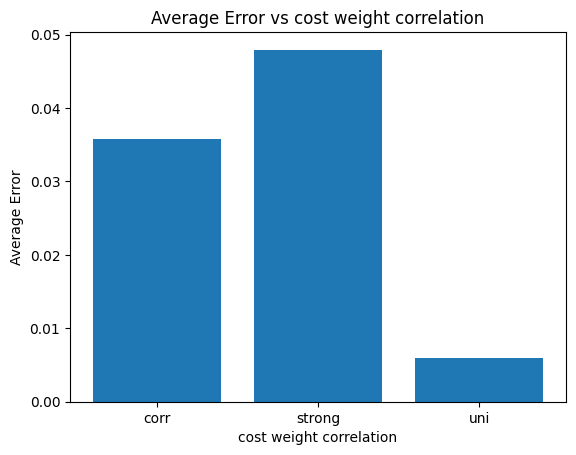

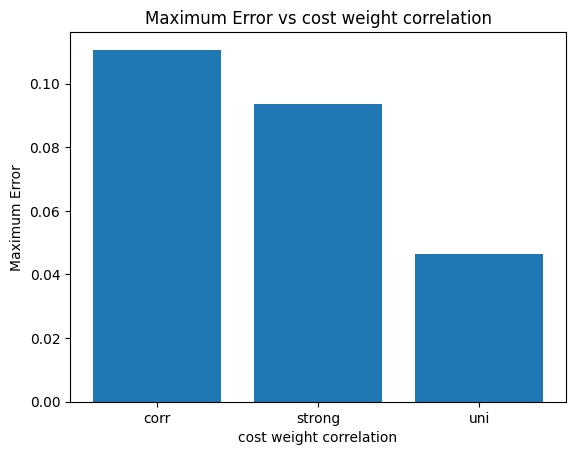

In [256]:
print(results_sh)

results_sh_cwc = results_sh[results_sh['type'] == 'CWC'].copy()
plt.bar(results_sh_cwc['cost_weight_correlation'], results_sh_cwc['average_error'])
plt.xlabel('cost weight correlation')
plt.ylabel('Average Error')
plt.title('Average Error vs cost weight correlation')

plt.savefig('CWC_error_vs_cvc.png')

plt.figure()
plt.bar(results_sh_cwc['cost_weight_correlation'], results_sh_cwc['maximum_error'])
plt.xlabel('cost weight correlation')
plt.ylabel('Maximum Error')
plt.title('Maximum Error vs cost weight correlation')
    
plt.savefig('CWC_max_error_vs_cvc.png')

     n  type  runtime_microseconds  maximum_cost  maximum_weight  \
0   10    IS                  1071           300             150   
1   15    IS                  1893           300             150   
2   20    IS                  3028           300             150   
3   25    IS                  3798           300             150   
4   30    IS                  4803           300             150   
20  20   CWC                  2904           300             150   
21  20   CWC                  3057           300             150   
22  20   CWC                  2937           300             150   
0   20    MC                  3729            25             150   
1   20    MC                  2711           200             150   
2   20    MC                  2961           400             150   
3   20    MC                  3050           700             150   
4   20    MC                  2973          1000             150   
5   20    MW                  3145           300

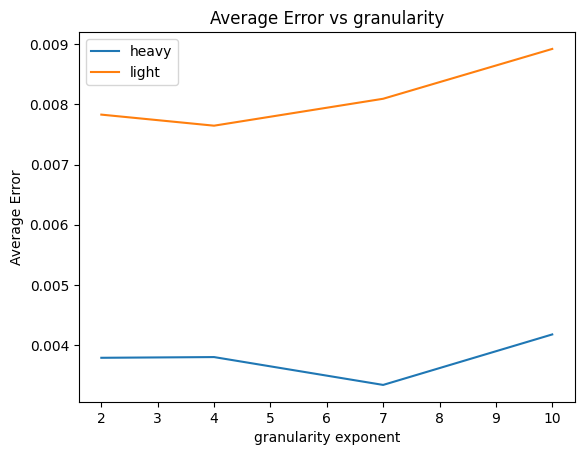

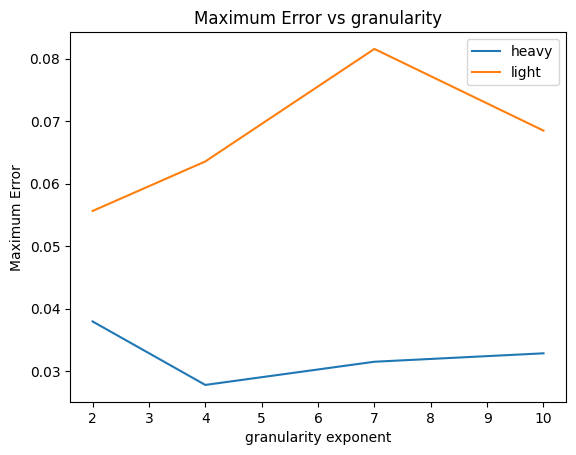

In [257]:
print(results_sh)

results_sh_gr = results_sh[results_sh['type'] == 'GR'].copy()
results_sh_gr_heavy = results_sh_gr[results_sh_gr['majority_of_items'] == 'heavy'].copy()
results_sh_gr_light = results_sh_gr[results_sh_gr['majority_of_items'] == 'light'].copy()

plt.plot(results_sh_gr_heavy['granularity_exponent'], results_sh_gr_heavy['average_error'], label='heavy')
plt.plot(results_sh_gr_light['granularity_exponent'], results_sh_gr_light['average_error'], label='light')
plt.xlabel('granularity exponent')
plt.ylabel('Average Error')
plt.title('Average Error vs granularity')
plt.legend()

plt.savefig('GR_error_vs_granularity.png')

plt.figure()
plt.plot(results_sh_gr_heavy['granularity_exponent'], results_sh_gr_heavy['maximum_error'], label='heavy')
plt.plot(results_sh_gr_light['granularity_exponent'], results_sh_gr_light['maximum_error'], label='light')
plt.xlabel('granularity exponent')
plt.ylabel('Maximum Error')
plt.title('Maximum Error vs granularity')
plt.legend()

plt.savefig('GR_max_error_vs_cvc.png')